<b><p>Nama : Fini Ardiani Br Damanik</p>
<p>Jenis Kelas : Kelas Dasar & Pemula Machine Learning Developer dari IDCamp 2021</p>
<p>Projek : Mengirimkan submission berupa program jaringan saraf tiruan menggunakan TensorFlow. Program Anda harus mampu mengenali bentuk tangan yang membentuk gunting, batu, atau kertas.</p>
<p>Asal Kota : Kabupaten Deli Serdang, Sumatera Utara</b>

In [ ]:
# MENDOWNLOAD FILE ZIP MELALUI LINK YANG DIBERIKAN DICODING
!wget --no-check-certificate \
https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip

--2021-05-29 06:09:52--  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip
Resolving dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)... 52.239.197.36
Connecting to dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)|52.239.197.36|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 322873683 (308M) [application/zip]
Saving to: ‘rockpaperscissors.zip’

rockpaperscissors.z 100%[===================>] 307.92M  6.55MB/s    in 89s     

2021-05-29 06:11:21 (3.48 MB/s) - ‘rockpaperscissors.zip’ saved [322873683/322873683]



In [ ]:
# 1) MENGIMPORT MODUL UNTUK MENGEKSTRAK FILE ZIP YANG TELAH DIDOWNLOAD
# import modul os, agar dapat mengakses file
import os

# import modul zipfile, agar file zip dapat terbaca
import zipfile

In [ ]:
# 2) PROSES MENGEKSTRAK FILE ZIP 
# definisikan file zip yg akan diekstrak
local_zip ='/content/rockpaperscissors.zip'

# membuka objek file zip
zip_ekstrak = zipfile.ZipFile(local_zip, 'r')

# engekstrak semua file dan folder dari file zip ke dalam direktori kerja
zip_ekstrak.extractall('/content/')

# menghentikan/menutup file zip_ekstrak
zip_ekstrak.close()

In [ ]:
# 3) MENGECEK TOTAL DARI GAMBAR GUNTING, BATU DAN KERTAS
# cek total ganbar gunting
gunting = os.path.join('/content/rockpaperscissors/scissors')
print('Banyak gambar gunting :', len(os.listdir(gunting)))

# cek total gambar batu
batu = os.path.join('/content/rockpaperscissors/rock')
print('Banyak gambar batu    :', len(os.listdir(batu)))

# cek total gambar kertas
kertas = os.path.join('/content/rockpaperscissors/paper')
print('Banyak gambar kertas  :', len(os.listdir(kertas)))

Banyak gambar gunting : 750
Banyak gambar batu    : 726
Banyak gambar kertas  : 712


In [ ]:
# 4) MENAMPILKAN BEBERAPA LIST GUNTING, BATU DAN KERTAS
# menampilkan 3 list file gunting
list_gunting = os.listdir(gunting)
print("Daftar gunting :", list_gunting[:3])

# menampilkan 3 list file batu
list_batu = os.listdir(batu)
print("Daftar batu    :", list_batu[:3])

# menampilkan 3 list file kertas
list_kertas = os.listdir(kertas)
print("Daftar kertas  :", list_kertas[:3])

Daftar gunting : ['W7ijVLyfVPL2msio.png', 'nukdu4gV8vol1FY9.png', 'oNZAuH1gIa65iSMu.png']
Daftar batu    : ['I1T89xw2qr4aTrzq.png', 'gjdBDXv7avQwgTr3.png', 'uK8EXLN4mejf6aN0.png']
Daftar kertas  : ['dmT5g2m3meABNfCJ.png', '04l5I8TqdzF9WDMJ.png', 'qtfGt3JjA0Orrg9v.png']


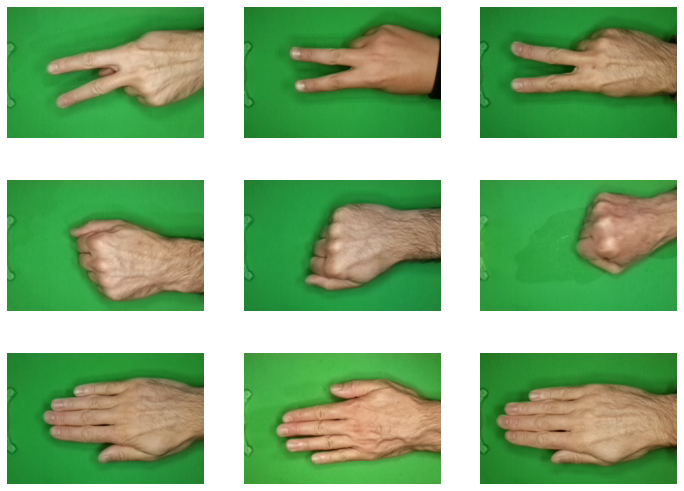

In [ ]:
# 5) TAMPILKAN GAMBAR GUNTING, BATU DAN KERTAS
#  mengimpor modul matplotlib untuk plot dan gambar
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# menentukan jumlah baris, kolom dan indeks awal tampilan gambar
nrows = 3
ncols = 3
figure_index = 0

# mengatur ukuran gambar menjadi 3x4
figure = plt.gcf()
figure.set_size_inches(ncols * 4, nrows * 3)

# indeks akan bertambah 3 disetiap barisnya
figure_index += 3

# tampilkan gambar gunting, batu dan kertas
show_gunting = [os.path.join(gunting, figure_name)
                for figure_name in list_gunting[figure_index-3:figure_index]]

show_batu = [os.path.join(batu, figure_name)
                for figure_name in list_batu[figure_index-3:figure_index]]

show_kertas = [os.path.join(kertas, figure_name)
                for figure_name in list_kertas[figure_index-3:figure_index]]

for i, img_path in enumerate(show_gunting+show_batu+show_kertas):
  sp = plt.subplot(nrows, ncols, i+1)
  
  # sumbu plot (gridlines) tidak ditampilkan
  sp.axis('off')

  # membaca gambar dam menampilkan gambar
  img =mpimg.imread(img_path)
  plt.imshow(img)

# menampilkan plot gambar
plt.show()

In [ ]:
# 6) MENCEGAH OVERFITTING DAN MENGHENTIKAN TRAINING DENGAN MENGGUNAKAN callback()
#    dimana, callbacks dibuat secara manual dengan memanggil objek Callback dari keras.
# import modul tensorflow, RMSprop, ImageDataGenerator dan train_test_split
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
import shutil

# membuat class myCallback 
class myCallback(tf.keras.callbacks.Callback):

  # menjalankan fungsi callbacks setiap satu epoch selesai dijalankan dalam sekali training
  def on_epoch_end(self, epoch, logs={}):

    # proses training dihentikan jika tingkat akurasi model yang dihasilkan > 98%
    if (logs.get('accuracy') > 0.98):
      print(" ")
      print("Tingkat akurasi model > 98%, proses training akan dihentikan")
      self.model.stop_training = True

callbacks = myCallback()

In [ ]:
# 7) MEMBAGI(SPLIT) DATASET /content/rockpaperscissors, DAN BUAT DIRECTORI BARU
# dataset rockpaperscissors disimpan kedalam variabel base_directory, lalu bagi base_directory menjadi: train_directory dan validation_directory
base_directory = "/content/rockpaperscissors"
train_directory = os.path.join(base_directory, "train")
validation_directory = os.path.join(base_directory, "val")

# buat directory baru dari hasil split yaitu : train_directory dan validation_directory
os.mkdir(train_directory)
os.mkdir(validation_directory)

# membagi base_directory menjadi : scissors_directory, rock_directory dan paper_directory
scissors_directory = os.path.join(base_directory, "scissors")
rock_directory = os.path.join(base_directory, "rock")
paper_directory = os.path.join(base_directory, "paper")

# dari directory scissors_directory, rock_directory, paper_directory dan train_directory, validation_directory
# bagi menjadi : 
train_scissors = os.path.join(train_directory, "scissors")
train_rock = os.path.join(train_directory, "rock")
train_paper = os.path.join(train_directory, "paper")
validation_scissors = os.path.join(validation_directory, "scissors")
validation_rock = os.path.join(validation_directory, "rock")
validation_paper = os.path.join(validation_directory, "paper")

# buat direktori baru dari hasil split
os.mkdir(train_scissors)
os.mkdir(train_rock)
os.mkdir(train_paper)
os.mkdir(validation_scissors)
os.mkdir(validation_rock)
os.mkdir(validation_paper)


In [ ]:
# 8) BAGI KEMBALI SETIAP DIREKTORI YANG TELAH DIBUAT MENJADI DATA TRAIN DAN DATA VALIDASI, DIMANA DATA TRAIN BERJUMLAH 40% DARI DATASET
train_directory_scissors, validation_directory_scissors = train_test_split(os.listdir(scissors_directory), test_size=0.40)
train_directory_rock, validation_directory_rock = train_test_split(os.listdir(rock_directory), test_size=0.40)
train_directory_paper, validation_directory_paper = train_test_split(os.listdir(paper_directory), test_size=0.40)

In [ ]:
# 9) LAKUKAN PROSES TRAINING DENGAN MENGGUNAKAN PERULANGAN
for data in train_directory_scissors :
  shutil.copy(os.path.join(scissors_directory, data), os.path.join(train_scissors, data))
for data in validation_directory_scissors :
  shutil.copy(os.path.join(scissors_directory, data), os.path.join(validation_scissors, data))

for data in train_directory_rock :
  shutil.copy(os.path.join(rock_directory, data), os.path.join(train_rock, data))
for data in validation_directory_rock :
  shutil.copy(os.path.join(rock_directory, data), os.path.join(validation_rock, data))

for data in train_directory_paper :
  shutil.copy(os.path.join(paper_directory, data), os.path.join(train_paper, data))
for data in validation_directory_paper :
  shutil.copy(os.path.join(paper_directory, data), os.path.join(validation_paper, data))
  

In [ ]:
# 10) LAKUKAN GENERATE DATA TRAIN DAN TEST DENGAN MENGGUNAKAN ImageDataGenerator()
# generate data train
train_data_generate = ImageDataGenerator(
    rescale = 1./255,
    rotation_range = 20,
    horizontal_flip = True,
    shear_range = 0.2,
    fill_mode = 'nearest'
)

# generate datar test
test_data_generate = ImageDataGenerator(
    rescale = 1./255,
    rotation_range = 20,
    horizontal_flip = True,
    vertical_flip = True,
    shear_range = 0.2,
    fill_mode = 'nearest'
)


In [ ]:
# 11) LAKUKAN PROSES AUGMENTASI DATA DARI DATA YG TELAH DI GENERATE
train_generator = train_data_generate.flow_from_directory(
    train_directory,
    target_size = (150, 150),
    batch_size =32, 
    class_mode = 'categorical'
)

validation_generator = test_data_generate.flow_from_directory(
    validation_directory,
    target_size = (150, 150),
    batch_size =32, 
    class_mode = 'categorical'
)


Found 1312 images belonging to 3 classes.
Found 876 images belonging to 3 classes.


In [ ]:
# 12) MEMBUAT MODEL SEQUENTIAL
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation = 'relu', input_shape = (150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Conv2D(64, (3, 3), activation = 'relu'),
    tf.keras.layers.MaxPooling2D(2, 2),

    tf.keras.layers.Conv2D(128, (3, 3), activation = 'relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(512, activation = 'relu'),
    tf.keras.layers.Dense(3, activation = 'softmax')
])


In [ ]:
# memanggil model sequential yg telah dibuat
model.summary()
model.compile(loss = 'categorical_crossentropy',
              optimizer = tf.optimizers.Adam(),
              metrics = ['accuracy'])

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
flatten (Flatten)            (None, 36992)             0

In [ ]:
# 13) MENJALANKAN PROSES TRAINING
# proses training akan berhenti jika tingkat akurasi yg dihasilkan > 98%
history = model.fit(
    train_generator,
    steps_per_epoch = 41,
    epochs = 25,
    validation_data = validation_generator,
    verbose = 2,
    callbacks = [callbacks]
)

Epoch 1/25
41/41 - 85s - loss: 0.9585 - accuracy: 0.5541 - val_loss: 0.9555 - val_accuracy: 0.6279
Epoch 2/25
41/41 - 82s - loss: 0.5237 - accuracy: 0.8018 - val_loss: 0.3371 - val_accuracy: 0.8790
Epoch 3/25
41/41 - 82s - loss: 0.3010 - accuracy: 0.8918 - val_loss: 0.2963 - val_accuracy: 0.9030
Epoch 4/25
41/41 - 82s - loss: 0.2346 - accuracy: 0.9085 - val_loss: 0.2599 - val_accuracy: 0.9167
Epoch 5/25
41/41 - 82s - loss: 0.1661 - accuracy: 0.9505 - val_loss: 0.2238 - val_accuracy: 0.9315
Epoch 6/25
41/41 - 82s - loss: 0.1540 - accuracy: 0.9474 - val_loss: 0.2377 - val_accuracy: 0.9269
Epoch 7/25
41/41 - 82s - loss: 0.1627 - accuracy: 0.9413 - val_loss: 0.2186 - val_accuracy: 0.9201
Epoch 8/25
41/41 - 82s - loss: 0.1325 - accuracy: 0.9543 - val_loss: 0.1998 - val_accuracy: 0.9384
Epoch 9/25
41/41 - 82s - loss: 0.1261 - accuracy: 0.9520 - val_loss: 0.2180 - val_accuracy: 0.9452
Epoch 10/25
41/41 - 82s - loss: 0.1287 - accuracy: 0.9497 - val_loss: 0.2020 - val_accuracy: 0.9281
Epoch 11/

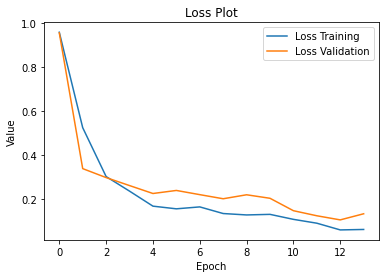

In [ ]:
# 14) PLOT LOSS FUNCTION 
plt.plot(history.history['loss'], label = 'Loss Training')
plt.plot(history.history['val_loss'], label = 'Loss Validation')
plt.title('Loss Plot')
plt.ylabel('Value')
plt.xlabel('Epoch')
plt.legend(loc="upper right")
plt.show()

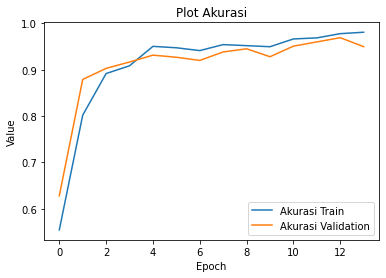

In [ ]:
# 15) PLOT AKURASI DARI TRAIN DAN VALIDATION
plt.plot(history.history['accuracy'], label = 'Akurasi Train')
plt.plot(history.history['val_accuracy'], label = 'Akurasi Validation')
plt.title('Plot Akurasi')
plt.ylabel('Value')
plt.xlabel('Epoch')
plt.legend(loc="lower right")
plt.show()

Saving 02vG75hQW9Vp4oTl.png to 02vG75hQW9Vp4oTl.png
02vG75hQW9Vp4oTl.png
Ini Batu


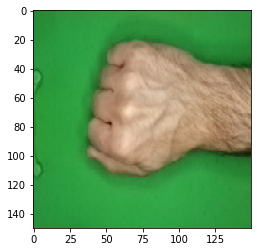

In [ ]:
# 16) MEMPREDIKSI GAMBAR YANG DIULOAD APAKAH MERUPAKAN GUNTING, BATU ATAU KERTAS
# import module yang diperlukan
import numpy as np
from google.colab import files
from keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.image as mpimg
%matplotlib inline

# proses upload file
upload_file = files.upload()

for x in upload_file.keys():
  path = x
  figure = image.load_img(path, target_size=(150, 150))
  figure_plot = plt.imshow(figure)
  y = image.img_to_array(figure)
  y = np.expand_dims(y, axis=0)

  figures = np.vstack([y])
  classes = model.predict(figures, batch_size=10)

  print(x)
  if classes[0, 0] != 0:
    print("Ini Kertas")
  elif classes [0, 1] != 0:
    print("Ini Batu")
  else:
    print("Ini Gunting")